In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.text as mtext

## a class defined for the legend (reproduced, original)
class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle, **self.text_props)
        handlebox.add_artist(title)
        return title

Influence maximization

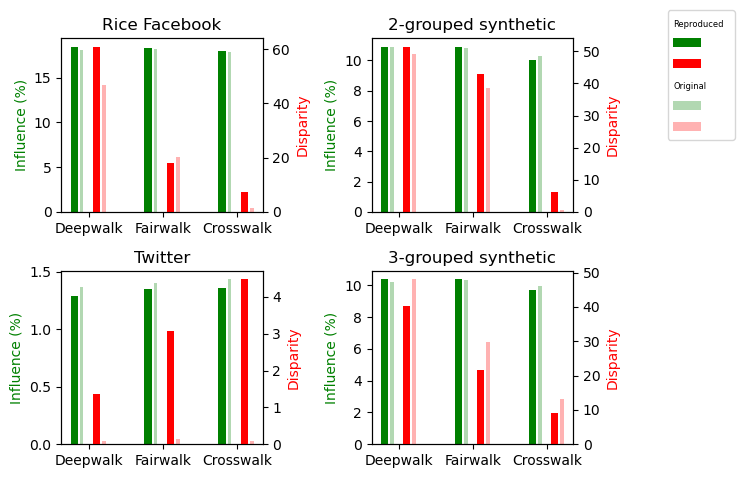

In [23]:
X = ['Deepwalk', 'Fairwalk', 'Crosswalk']
X_axis = np.arange(len(X))
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.set_xticks(X_axis, X)
ax2.set_xticks(X_axis, X)
ax3.set_xticks(X_axis, X)
ax4.set_xticks(X_axis, X)
ax1_2 = ax1.twinx()
ax2_2 = ax2.twinx()
ax3_2 = ax3.twinx()
ax4_2 = ax4.twinx()

ax1.set_ylabel('Influence (%)',color='g')
ax1_2.set_ylabel('Disparity',color='r')
ax2.set_ylabel('Influence (%)',color='g')
ax2_2.set_ylabel('Disparity',color='r')
ax3.set_ylabel('Influence (%)',color='g')
ax3_2.set_ylabel('Disparity',color='r')
ax4.set_ylabel('Influence (%)',color='g')
ax4_2.set_ylabel('Disparity',color='r')


for data in ['rice','synth2', 'twitter','synth3']:
    inf_list = []
    dis_list = []

    for method in ['deepwalk','fairwalk','crosswalk']:
        results = []
        variances = []
        for i in ['1','2','3','4','5']:
            with open('../data/'+data+'/infmaxresults/'+method+'/'+data+'_graph_'+method+'_'+i+'_results.txt')as f:
                variance0,variance1=[],[]
                if data == 'synth3' or data == 'twitter' or data == 'synthx3':
                    variance2=[]
                variance = []
                content = f.readlines()
                content = content[0].split()
                variance0.append(float(content[2]))
                variance1.append(float(content[4]))
                inf = float(content[0])
                if data == 'synth3' or data == 'twitter' or data == 'synthx3':
                    variance2.append(float(content[6]))

                results.append(inf)
        var0,var1 = np.mean(variance0), np.mean(variance1),
        if data == 'synth3' or data == 'twitter' or data == 'synthx3':
            var2 = np.mean(variance2)

        if data == 'synth2':
            variances.append(np.var([var0/150*100,var1/350*100]))
        if data == 'synth3' or data == 'synthx3':
            variances.append(np.var([var0/125*100,var1/300*100,var2/75*100]))
        if data == 'rice':
            variances.append(np.var([var0/97*100,var1/344*100]))
        if data == 'twitter':
            variances.append(np.var([var0/2598*100,var1/782*100,var2/180*100]))

        nodes = 500
        if data == 'rice':
            nodes = 441
        if data == 'twitter':
            nodes = 3753
        influence = []
        for res in results:
            influence.append( res/nodes * 100 )
            mean = str(np.mean(influence))
            std = str(np.std(influence))

        with open('../data/'+data+'/infmaxresults/'+method+'/overal_results.txt','w') as f:
            f.write('Influence:    mean: '+mean+ '      std: '+std)
            f.write('    Disparity:    mean: '+str(np.mean(variances))+ '      std: '+str(np.std(variances)))

        inf_list.append(np.mean(influence))
        dis_list.append(np.mean(variances))

    if data =='rice':
        y= [0,20,40,60]
        dis_old = [46.7044,20.2512,1.35673] #taken out of Khajehnejad et al. open GitHub (notebooks)
        inf_old = [18.1372,18.2024,17.8927] #taken out of Khajehnejad et al. open GitHub (notebooks)
        new_inf_bar = ax1.bar(X_axis - 0.2, inf_list,0.1,color='g')
        old_inf_bar= ax1.bar(X_axis - 0.1, inf_old,0.05,color='g', alpha=0.3)

        new_dis_bar = ax1_2.bar(X_axis + 0.1, dis_list,0.1,color='r')
        old_dis_bar = ax1_2.bar(X_axis + 0.2, dis_old,0.05,color='r', alpha=0.3)

        ax1.title.set_text('Rice Facebook')
    if data == 'synth2':
        y= [0,20,40,60]
        inf_old = [10.9143,10.8399,10.2663] #taken out of Khajehnejad et al. open GitHub (notebooks)
        dis_old = [49.0868,38.5511,0.569666] #taken out of Khajehnejad et al. open GitHub (notebooks)
        new_inf_bar = ax2.bar(X_axis - 0.2, inf_list,0.1,color='g')
        old_inf_bar= ax2.bar(X_axis - 0.1, inf_old,0.05,color='g', alpha=0.3)

        new_dis_bar = ax2_2.bar(X_axis + 0.1, dis_list,0.1,color='r')
        old_dis_bar = ax2_2.bar(X_axis + 0.2, dis_old,0.05,color='r', alpha=0.3)
        ax2.title.set_text('2-grouped synthetic')
    if data == 'twitter':
        y=[0,0.5,1,1.5,2]
        inf_old = [1.36966,1.40412,1.43481] #taken out of Khajehnejad et al. open GitHub (notebooks)
        dis_old = [0.0895197,0.148194,0.0788517] #taken out of Khajehnejad et al. open GitHub (notebooks)
        new_inf_bar = ax3.bar(X_axis - 0.2, inf_list,0.1,color='g')
        old_inf_bar= ax3.bar(X_axis - 0.1, inf_old,0.05,color='g', alpha=0.3)

        new_dis_bar = ax3_2.bar(X_axis + 0.1, dis_list,0.1,color='r')
        old_dis_bar = ax3_2.bar(X_axis + 0.2, dis_old,0.05,color='r', alpha=0.3)
        ax3.title.set_text('Twitter')
    if data =='synth3' or data == 'synthx3':
        y=[0,10,20,30,40]
        inf_old = [10.193,10.3033,9.95952]
        dis_old = [48.0831,29.8332,13.0355]
        new_inf_bar = ax4.bar(X_axis - 0.2, inf_list,0.1,color='g')
        old_inf_bar= ax4.bar(X_axis - 0.1, inf_old,0.05,color='g', alpha=0.3)

        new_dis_bar = ax4_2.bar(X_axis + 0.1, dis_list,0.1,color='r')
        old_dis_bar = ax4_2.bar(X_axis + 0.2, dis_old,0.05,color='r', alpha=0.3)
        ax4.title.set_text('3-grouped synthetic')

fig.legend(['Reproduced', new_inf_bar,new_dis_bar, 'Original', old_inf_bar,old_dis_bar], ['    ', '   ','   ', '    ', '    ','    '],
    handler_map={str: LegendTitle({'fontsize': 6})},bbox_to_anchor=(1.04, 1),loc='upper left')
fig.tight_layout()
fig.savefig("../figures/reproduced_infmax_all4.pdf",bbox_inches = "tight")
plt.show()

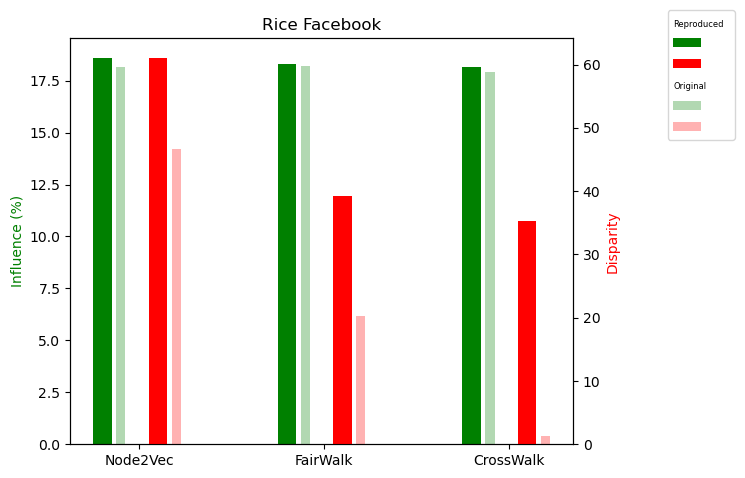

In [24]:
X = ['Node2Vec','FairWalk','CrossWalk']
fig,ax = plt.subplots()

ax.set_xticks(X_axis, X)
ax2 = ax.twinx()

ax.set_ylabel('Influence (%)',color='g')
ax2.set_ylabel('Disparity',color='r')


inf_list = []
dis_list = []
data='rice'
for method in ['deepwalk','fairwalk','crosswalk']:
    results = []
    variances = []
    for i in ['1','2','3','4','5']:
        with open('../data/'+data+'/N2Vinfmaxresults/'+method+'/'+data+'_graph_'+method+'_'+i+'_n2v_results.txt')as f:
            variance = []
            content = f.readlines()
            content = content[0].split()
            inf = float(content[0])
            variance.append(float(content[2]))
            variance.append(float(content[4]))
            variances.append(np.var([variance[0]/97*100,variance[1]/344*100]))
            results.append(inf)
    nodes = 441
    influence = []
    for res in results:
        influence.append( res/nodes * 100 )
        mean = str(np.mean(influence))
        std = str(np.std(influence))

    with open('../data/'+data+'/N2Vinfmaxresults/'+method+'/overal_results.txt','w') as f:
        f.write('Influence:    mean: '+mean+ '      std: '+std)
        f.write('    Disparity:    mean: '+str(np.mean(variances))+ '      std: '+str(np.std(variances)))

    inf_list.append(np.mean(influence))
    dis_list.append(np.mean(variances))

dis_old = [46.7044,20.2512,1.35673] #taken out of Khajehnejad et al. open GitHub (notebooks)
inf_old = [18.1372,18.2024,17.8927] #taken out of Khajehnejad et al. open GitHub (notebooks)
new_inf_bar = ax.bar(X_axis - 0.2, inf_list,0.1,color='g')
old_inf_bar= ax.bar(X_axis - 0.1, inf_old,0.05,color='g', alpha=0.3)

new_dis_bar = ax2.bar(X_axis + 0.1, dis_list,0.1,color='r')
old_dis_bar = ax2.bar(X_axis + 0.2, dis_old,0.05,color='r', alpha=0.3)

ax.title.set_text('Rice Facebook')

fig.legend(['Reproduced', new_inf_bar,new_dis_bar, 'Original', old_inf_bar,old_dis_bar], ['    ', '   ','   ', '    ', '    ','    '],
    handler_map={str: LegendTitle({'fontsize': 6})},bbox_to_anchor=(1.04, 1),loc='upper left')

fig.tight_layout()
fig.savefig("../figures/reproduced_node2vec_rice.pdf",bbox_inches = "tight")
plt.show()

Link predection

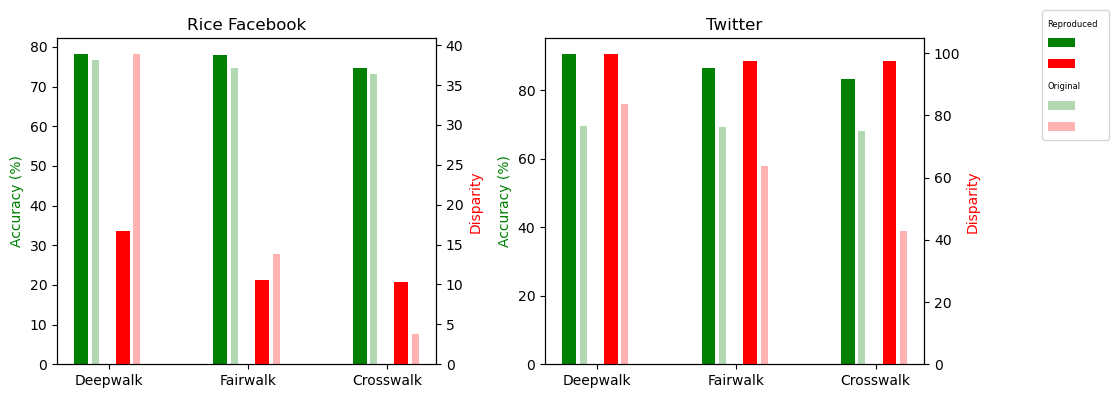

In [25]:
X = ['Deepwalk', 'Fairwalk', 'Crosswalk']
X_axis = np.arange(len(X))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.set_xticks(X_axis, X)
ax2.set_xticks(X_axis, X)
ax1_2 = ax1.twinx()
ax2_2 = ax2.twinx()

ax1.set_ylabel('Accuracy (%)',color='g')
ax1_2.set_ylabel('Disparity',color='r')
ax2.set_ylabel('Accuracy (%)',color='g')
ax2_2.set_ylabel('Disparity',color='r')

for data in ['rice','twitter']:
    acc_list = []
    dis_list = []
    for method in ['deepwalk','fairwalk','crosswalk']:
        avr_acc=[]
        avr_dis=[]
        for i in ['1','2','3','4','5']:
            with open('../data/'+data+'/lpresults/'+method+'/'+data+'_graph_'+method+'_'+i+'_lpresults.txt') as f:
                content = f.readlines()
                content = content[0].split()
                avr_acc.append(float(content[11]))
                avr_dis.append(float(content[9]))
        acc_list.append(np.mean(avr_acc))
        dis_list.append(np.mean(avr_dis))

    if data == 'rice':
        acc_old = [76.79,74.66,73.26]#taken out of Khajehnejad et al. open GitHub (notebooks)
        dis_old = [38.91,13.77,3.75]#taken out of Khajehnejad et al. open GitHub (notebooks)
        new_inf_bar = ax1.bar(X_axis - 0.2, acc_list,0.1,color='g')
        old_inf_bar= ax1.bar(X_axis - 0.1, acc_old,0.05,color='g', alpha=0.3)

        new_dis_bar = ax1_2.bar(X_axis + 0.1, dis_list,0.1,color='r')
        old_dis_bar = ax1_2.bar(X_axis + 0.2, dis_old,0.05,color='r', alpha=0.3)
        ax1.title.set_text('Rice Facebook')

    if data == "twitter":
        acc_old = [69.45,69.17,68.02]#taken out of Khajehnejad et al. open GitHub (notebooks)
        dis_old = [83.65,63.82,42.79]#taken out of Khajehnejad et al. open GitHub (notebooks)
        new_inf_bar = ax2.bar(X_axis - 0.2, acc_list,0.1,color='g')
        old_inf_bar= ax2.bar(X_axis - 0.1, acc_old,0.05,color='g', alpha=0.3)

        new_dis_bar = ax2_2.bar(X_axis + 0.1, dis_list,0.1,color='r')
        old_dis_bar = ax2_2.bar(X_axis + 0.2, dis_old,0.05,color='r', alpha=0.3)
        ax2.title.set_text('Twitter')

fig.legend(['Reproduced', new_inf_bar,new_dis_bar, 'Original', old_inf_bar,old_dis_bar], ['    ', '   ','   ', '    ', '    ','    '],
    handler_map={str: LegendTitle({'fontsize': 6})},bbox_to_anchor=(1.04, 1),loc='upper left')

fig.tight_layout()
fig.savefig("../figures/reproduced_linkpred_rice_twitter.pdf", bbox_inches = "tight")
plt.show()

Node classification

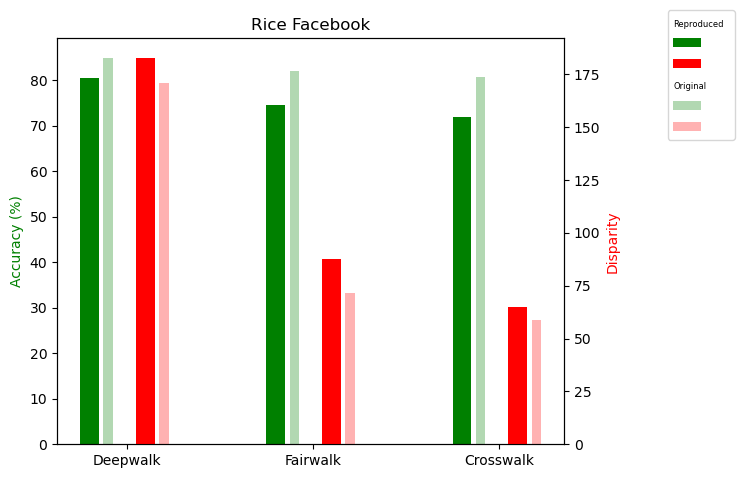

In [26]:
fig,ax = plt.subplots()

ax.set_xticks(X_axis, X)
ax2 = ax.twinx()

ax.set_ylabel('Accuracy (%)',color='g')
ax2.set_ylabel('Disparity',color='r')

inf_list = []
dis_list = []
data= 'rice'
for method in ['deepwalk','fairwalk','crosswalk']:
    for i in ['1','2','3','4','5']:
        avr_inf = []
        avr_dis = []
        with open('../data/'+data+'/ncresults/'+method+'/rice_graph_'+method+'_'+i+'_ncresults.txt') as f:
            content = f.readlines()
            content = content[0].split(',')
            avr_inf.append(float(content[0]))
            avr_dis.append(float(content[4]))
    inf_list.append(np.mean(avr_inf))
    dis_list.append(np.mean(avr_dis))
dis_old = [171.007,71.3728,58.688] #taken out of Khajehnejad et al. open GitHub (notebooks)
inf_old = [84.9455,81.9432,80.7205] #taken out of Khajehnejad et al. open GitHub (notebooks)
new_inf_bar = ax.bar(X_axis - 0.2, inf_list,0.1,color='g')
old_inf_bar= ax.bar(X_axis - 0.1, inf_old,0.05,color='g', alpha=0.3)

new_dis_bar = ax2.bar(X_axis + 0.1, dis_list,0.1,color='r')
old_dis_bar = ax2.bar(X_axis + 0.2, dis_old,0.05,color='r', alpha=0.3)

ax.title.set_text('Rice Facebook')

fig.legend(['Reproduced', new_inf_bar,new_dis_bar, 'Original', old_inf_bar,old_dis_bar], ['    ', '   ','   ', '    ', '    ','    '],
    handler_map={str: LegendTitle({'fontsize': 6})},bbox_to_anchor=(1.04, 1),loc='upper left')

fig.tight_layout()
fig.savefig("../figures/reproduced_nodeclass_rice.pdf",bbox_inches = "tight")
plt.show()